In [356]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

In [357]:
srcdir = "../../../data/eval/miniwob/230808/"
metric = 'success'

In [358]:
dfs = []

for filename in os.listdir(srcdir):
    if filename.endswith(".csv"):
        filepath = os.path.join(srcdir, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

df_file = pd.concat(dfs, ignore_index=True)
df = df_file

df['success'] = df['success'].apply(lambda x: float(eval(x)) if isinstance(x, str) else float(x))
print(len(df))
df.head(5)

6714


,task,seed,policy,success,task_progress,num_actions
0,click-collapsible-2,0,paw_fewshot,1.0,1.0,4
1,click-collapsible-2,0,paw_zeroshot,0.0,0.0,4
2,click-collapsible-2,0,flat_fewshot,1.0,1.0,3
3,click-collapsible-2,0,flat_zeroshot,1.0,1.0,3
4,click-collapsible-2,1,paw_fewshot,1.0,1.0,4


In [ ]:
# Overwrite row with best metric val from concatenated dataframe

df_group = df.groupby(['task', 'seed', 'policy'])

max_metric = df_group[metric].max()
df = df_group.first().reset_index()
df[metric] = max_metric.values

# Filter the DataFrame by a specific policy value
filtered_df = df[df['policy'] == 'paw_fewshot']
# Tally the count for each unique task for the given policy value
task_tally = filtered_df['task'].value_counts()
# Print the result
print(task_tally)

In [361]:
# Tasks
single_tasks = ['click-link', 
                'click-option', 
                'focus-text', 
                'click-button', 
                'click-button-sequence', 'click-dialog', 'click-dialog-2', 'click-tab', 'click-test', 'click-test-2', 'enter-text', 'focus-text-2', 'enter-text-dynamic', 'enter-password', 'login-user', 'click-pie', 'enter-date', 'grid-coordinate', 'click-widget']

complex_tasks = [ 'email-inbox', 'email-inbox-nl-turk', 'email-inbox-forward-nl-turk', 'multi-orderings', 'choose-date', 'click-collapsible-2', 'simple-arithmetic', 'click-tab-2', 'click-tab-2-hard', 'multi-layouts', 'copy-paste', 'click-collapsible', 'choose-date-easy', 'copy-paste-2', 'simple-algebra', 'click-checkboxes', 'click-checkboxes-transfer', 'login-user-popup', 'click-checkboxes-soft', 'enter-text-2', 'email-inbox-forward-nl', 'search-engine', 'find-word', 'choose-date-medium', 'click-checkboxes-large', 'book-flight']

tasks =  single_tasks + complex_tasks

In [364]:
import pandas as pd

metrics =  ['success', 'num_actions']
policies = ['flat_zeroshot', 'flat_fewshot', 'paw_zeroshot', 'paw_fewshot']
table_columns = ['flat_zeroshot_success', 'flat_zeroshot_num_actions', 'flat_fewshot_success', 'flat_fewshot_num_actions', 'paw_zeroshot_success', 'paw_zeroshot_num_actions', 'paw_fewshot_success', 'paw_fewshot_num_actions']

mean_table = pd.DataFrame()
error_table = pd.DataFrame()
max_seed = 50
zero_offset = 0.0


for metric in metrics:
    df_sub = df[df['policy'].isin(policies)] if policies is not None else df
    df_sub = df_sub[df_sub['task'].isin(tasks)] if tasks is not None else df_sub

    # Group the filtered DataFrame by 'policy' and 'task' and calculate the average metric
    df_group = df_sub.groupby(['policy', 'task'])[metric].mean().reset_index()
    df_group_se = df_sub.groupby(['policy', 'task'])[metric].sem().reset_index()
    
    pivot_table = df_group.pivot(index='task', columns='policy', values=metric)
    pivot_table[pivot_table == 0] = zero_offset
    pivot_table = (pivot_table * max_seed).astype(int) / max_seed
    
    pivot_table_se = df_group_se.pivot(index='task', columns='policy', values=metric)

    # Rename the columns to include the metric
    pivot_table.columns = [f'{col}_{metric}' for col in pivot_table.columns]

    if mean_table.empty:
        mean_table = pivot_table
    else:
        mean_table = pd.concat([mean_table, pivot_table], axis=1)
        
    # Rename the columns to include the metric
    pivot_table_se.columns = [f'{col}_{metric}' for col in pivot_table_se.columns]

    if error_table.empty:
        error_table = pivot_table_se
    else:
        error_table = pd.concat([error_table, pivot_table_se], axis=1)

mean_table = mean_table[table_columns]
mean_table = mean_table.reindex(tasks)

error_table = error_table[table_columns]
error_table = error_table.reindex(tasks)

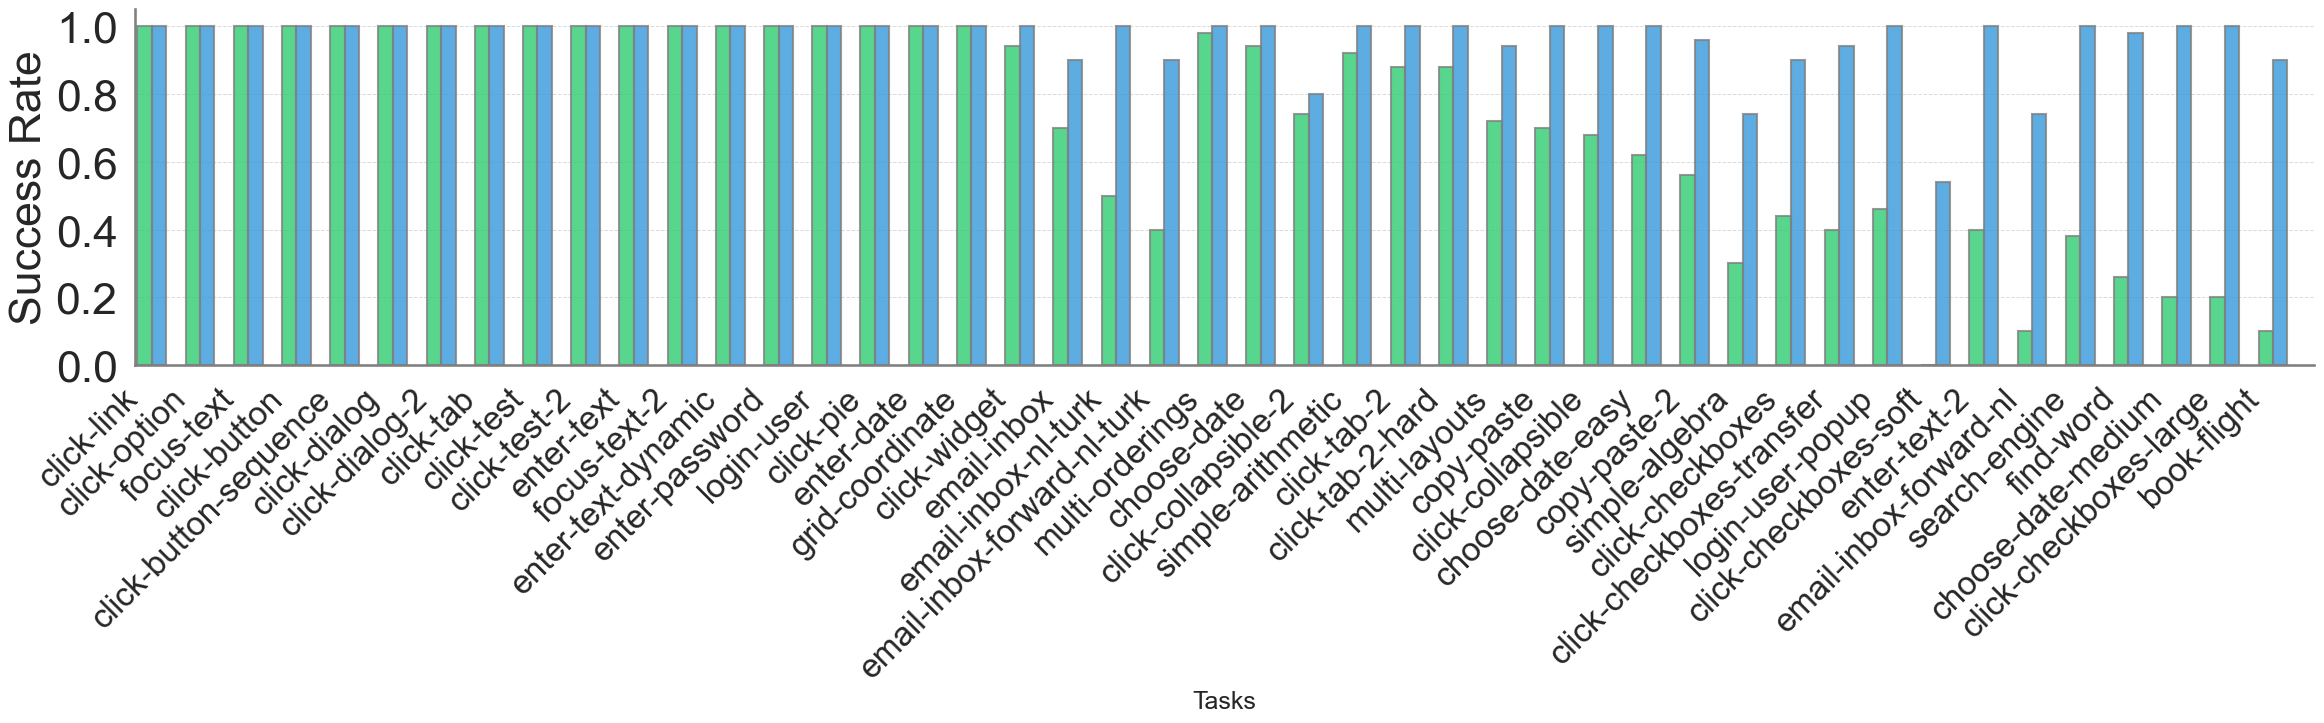

In [365]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
fontsize_plots = 32
plt.rcParams.update({'font.size': fontsize_plots})
bar_width = 0.3

index = range(len(mean_table))

## Compute the difference between "paw_fewshot" and "flat_fewshot" success rates
# mean_table['difference'] = mean_table['paw_fewshot_success'] - mean_table['flat_fewshot_success']
# mean_table_sorted = mean_table.sort_values(by=['difference', 'paw_fewshot_success', 'flat_fewshot_success'], ascending=[True, False, False])
# sorted_tasks = mean_table_sorted.index.tolist()

# sorted_tasks = ['click-link', 'click-option', 'focus-text', 'click-button', 'click-button-sequence', 'click-dialog', 'click-dialog-2', 'click-tab', 'click-test', 'click-test-2', 'enter-text', 'focus-text-2', 'enter-text-dynamic', 'enter-password', 'login-user', 'click-pie', 'enter-date', 'grid-coordinate',  'click-widget', 'email-inbox', 'email-inbox-nl-turk', 'email-inbox-forward-nl-turk', 'multi-orderings', 'choose-date', 'click-collapsible-2', 'simple-arithmetic', 'click-tab-2', 'click-tab-2-hard', 'multi-layouts', 'copy-paste', 'click-collapsible', 'choose-date-easy', 'copy-paste-2', 'simple-algebra', 'click-checkboxes', 'click-checkboxes-transfer', 'login-user-popup', 'click-checkboxes-soft', 'enter-text-2', 'email-inbox-forward-nl', 'search-engine', 'find-word', 'choose-date-medium', 'click-checkboxes-large', 'book-flight', 'click-menu', 'click-color', 'choose-list', 'click-shades', 'social-media', 'social-media-all']

sorted_tasks = ['click-link', 'click-option', 'focus-text', 'click-button', 'click-button-sequence', 'click-dialog', 'click-dialog-2', 'click-tab', 'click-test', 'click-test-2', 'enter-text', 'focus-text-2', 'enter-text-dynamic', 'enter-password', 'login-user', 'click-pie', 'enter-date', 'grid-coordinate',  'click-widget', 'email-inbox', 'email-inbox-nl-turk', 'email-inbox-forward-nl-turk', 'multi-orderings', 'choose-date', 'click-collapsible-2', 'simple-arithmetic', 'click-tab-2', 'click-tab-2-hard', 'multi-layouts', 'copy-paste', 'click-collapsible', 'choose-date-easy', 'copy-paste-2', 'simple-algebra', 'click-checkboxes', 'click-checkboxes-transfer', 'login-user-popup', 'click-checkboxes-soft', 'enter-text-2', 'email-inbox-forward-nl', 'search-engine', 'find-word', 'choose-date-medium', 'click-checkboxes-large', 'book-flight']

mean_table_sorted = mean_table.loc[sorted_tasks]

# Plotting bars for both columns with gradient shading
plt.bar(index, mean_table_sorted['flat_fewshot_success'], bar_width, label='flat_fewshot', color='#2ecc71', alpha=0.8, edgecolor='gray')
plt.bar([i + bar_width for i in index], mean_table_sorted['paw_fewshot_success'], bar_width, label='paw_fewshot', color='#3498db', alpha=0.8, edgecolor='gray')

# Setting the x axis labels with bold font and adjusted positions
plt.xlabel('Tasks')
plt.ylabel('Success Rate', fontsize=fontsize_plots)
plt.xlim(-0.2, max(index) + 1)
plt.yticks(fontsize=fontsize_plots)
plt.xticks(index, mean_table_sorted.index, rotation=45, ha="right", fontsize=fontsize_plots-8)  # Adjusted tick positions and alignment
# plt.legend()

# Setting the grid and background color
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Displaying the modified plot
plt.tight_layout()
plt.show()

In [367]:
def highlight_max(s, columns):
    '''
    Highlight the maximum in a Series yellow.
    '''
    is_max = s[columns] == s[columns].max()
    return ['background-color: yellow' if col in columns and is_max[col] else '' for col in s.index]

def highlight_worse_fewshot(s, lower, upper, color='red'):
    '''
    Highlight the 'flat_fewshot_success' in a specified color if it's worse than 'flat_zeroshot_success'.
    '''
    if s[upper] < s[lower]:
        return ['background-color: {}'.format(color) if col == upper else '' for col in s.index]
    else:
        return ['' for col in s.index]

mean_table = mean_table.dropna()
styled_mean_table = mean_table.style.apply(highlight_max, columns=['flat_zeroshot_success', 'flat_fewshot_success', 'paw_zeroshot_success', 'paw_fewshot_success'], axis=1).apply(highlight_worse_fewshot, lower='flat_zeroshot_success',upper='flat_fewshot_success', axis=1).apply(highlight_worse_fewshot, lower='paw_zeroshot_success',upper='paw_fewshot_success', axis=1)
styled_mean_table

,flat_zeroshot_success,flat_zeroshot_num_actions,flat_fewshot_success,flat_fewshot_num_actions,paw_zeroshot_success,paw_zeroshot_num_actions,paw_fewshot_success,paw_fewshot_num_actions
task,,,,,,,,
click-link,0.940000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
click-option,0.760000,3.680000,1.000000,2.620000,0.800000,2.940000,1.000000,1.940000
focus-text,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
click-button,0.980000,1.020000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
click-button-sequence,0.960000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
click-dialog,1.000000,1.060000,1.000000,1.200000,1.000000,1.280000,1.000000,1.020000
click-dialog-2,0.980000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,1.020000
click-tab,1.000000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,1.040000
click-test,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


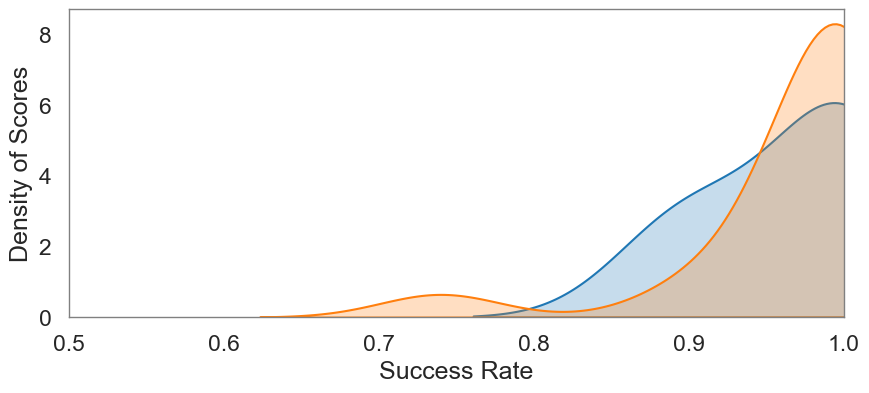

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 36})
sns.set_context("talk")  # can be 'paper', 'notebook', 'talk', 'poster'

train_tasks = ["choose-date", "book-flight", "search-engine"]
test_tasks = ['copy-paste', 'copy-paste-2', 'simple-algebra',
       'find-word', 'enter-text-dynamic', 'enter-password', 'multi-layouts',
       'multi-orderings', 'login-user', 'simple-arithmetic', 'book-flight', 'click-pie',
       'login-user-popup', 'click-tab-2', 'click-tab-2-hard', 'click-checkboxes-large']

train_df = mean_table[mean_table.index.isin(train_tasks)]
test_df = mean_table[mean_table.index.isin(test_tasks)]

# Setting up the seaborn style
sns.set_style("white")

# Plotting the KDE for both columns
sns.kdeplot(train_df['paw_fewshot_success'], fill=True, label='Train Success Rate', color='#1f77b4')
sns.kdeplot(test_df['paw_fewshot_success'], fill=True, label='Test Success Rate', color='#ff7f0e')

# Adjusting the spines
for spine in plt.gca().spines.values():
    spine.set_edgecolor('gray')  # You can change 'lightgray' to any other color
    spine.set_linewidth(1)
    
# Titles and labels
# plt.title('Density Plot of Train vs Test Success Rate (MiniWob++)')
plt.xlabel('Success Rate')
plt.ylabel('Density of Scores')
plt.xlim(0.5, 1)  # Limiting the x-axis range
# plt.legend(loc='upper left')  # Moved the legend to the top left

plt.show()